!pip install spacy
from spacy.cli import download
download('en_core_web_sm')

# Imports and functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
def batch_preprocess_texts(
    texts,
    nlp=None,
    remove_stopwords=True,
    remove_punct=True,
    use_lemmas=False,
    disable=["ner"],
    batch_size=50,
    n_process=-1,
    ):
    """Efficiently preprocess a collection of texts using nlp.pipe()

    Args:
        texts (collection of strings): collection of texts to process (e.g. df['text'])
        nlp (spacy pipe), optional): Spacy nlp pipe. Defaults to None; if None, it creates a default 'en_core_web_sm' pipe.
        remove_stopwords (bool, optional): Controls stopword removal. Defaults to True.
        remove_punct (bool, optional): Controls punctuation removal. Defaults to True.
        use_lemmas (bool, optional): lemmatize tokens. Defaults to False.
        disable (list of strings, optional): named pipeline elements to disable. Defaults to ["ner"]: Used with nlp.pipe(disable=disable)
        batch_size (int, optional): Number of texts to process in a batch. Defaults to 50.
        n_process (int, optional): Number of CPU processors to use. Defaults to -1 (meaning all CPU cores).

    Returns:
        list of tokens
    """
    # from tqdm.notebook import tqdm
    from tqdm import tqdm

    if nlp is None:
        nlp = spacy.load("en_core_web_sm")

    processed_texts = []

    for doc in tqdm(nlp.pipe(texts, disable=disable, batch_size=batch_size, n_process=n_process)):
        tokens = []
        for token in doc:
            # Check if should remove stopwords and if token is stopword
            if (remove_stopwords == True) and (token.is_stop == True):
                # Continue the loop with the next token
                continue

            # Check if should remove stopwords and if token is stopword
            if (remove_punct == True) and (token.is_punct == True):
                continue

            # Check if should remove stopwords and if token is stopword
            if (remove_punct == True) and (token.is_space == True):
                continue

            
            ## Determine final form of output list of tokens/lemmas
            if use_lemmas:
                tokens.append(token.lemma_.lower())
            else:
                tokens.append(token.text.lower())

        processed_texts.append(tokens)
    return processed_texts


# [Data](https://drive.google.com/file/d/16Dqjymk1tdZWPxexs7lM7z1RTk405PAL/view)

- Read in csv
- EDA

In [3]:
file= "Data/Fake_Real_News_Data.csv"
df = pd.read_csv(file, index_col=0)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 198.0+ KB


,title,text,label
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL


In [4]:
df.shape

(6335, 3)

In [5]:
df.isna().sum()

title    0
text     0
label    0
dtype: int64

In [6]:
df.duplicated().sum()

29

In [7]:
df = df.drop_duplicates()
df.duplicated().sum()


0

# Import spacy
- Disable the parser and named object recognizer
- Tokenize text
  - Don't remove stop words or punctuation
- Lemmatize text
  - remove stopwords and punctuation
- Joined Lemmaized data
  - Join each lemmatized docuent inot a single string
 

In [9]:
import spacy
nlp_token = spacy.load('en_core_web_sm', disable = ["parser", "ner"])
nlp_token.pipe_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']

In [17]:
df['tokens'] = batch_preprocess_texts(df['text'], remove_stopwords=False, remove_punct=False, nlp = nlp_token)
df.head()

6306it [01:59, 52.95it/s] 


,title,text,label,tokens
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,"[donald, trump, endorsed, an, unabashedly, non..."
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,"[while, some, justice, department, investigati..."
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,"[trump, proudly, declares, :, most, of, the, p..."
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,"[donald, trump, spent, a, day, in, january, 20..."
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,"[notable, names, include, ray, washburne, (, c..."


In [19]:
df['lemmas'] = batch_preprocess_texts(df['text'], nlp = nlp_token, use_lemmas=True)
df.head()

6306it [01:56, 53.93it/s] 


,title,text,label,tokens,lemmas
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,"[donald, trump, endorsed, an, unabashedly, non...","[donald, trump, endorse, unabashedly, noninter..."
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,"[while, some, justice, department, investigati...","[justice, department, investigation, adversari..."
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,"[trump, proudly, declares, :, most, of, the, p...","[trump, proudly, declare, people, insult, dese..."
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,"[donald, trump, spent, a, day, in, january, 20...","[donald, trump, spend, day, january, 2014, hob..."
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,"[notable, names, include, ray, washburne, (, c...","[notable, name, include, ray, washburne, comme..."


In [20]:
df['lemmas-joined'] = df['lemmas'].map(lambda x: " ".join(x))
df.head()

,title,text,label,tokens,lemmas,lemmas-joined
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,"[donald, trump, endorsed, an, unabashedly, non...","[donald, trump, endorse, unabashedly, noninter...",donald trump endorse unabashedly noninterventi...
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,"[while, some, justice, department, investigati...","[justice, department, investigation, adversari...",justice department investigation adversarial n...
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,"[trump, proudly, declares, :, most, of, the, p...","[trump, proudly, declare, people, insult, dese...",trump proudly declare people insult deserved a...
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,"[donald, trump, spent, a, day, in, january, 20...","[donald, trump, spend, day, january, 2014, hob...",donald trump spend day january 2014 hobnob pol...
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,"[notable, names, include, ray, washburne, (, c...","[notable, name, include, ray, washburne, comme...",notable name include ray washburne commerce da...


# Analyze class balance and document lengths:

- What is the class balance? How many real and fake articles are there?
- What is the average word count for real news articles? What about fake ones?
  - Hint, you can map the len() function to the tokenized text to create a new column, then find the average of that column 

In [21]:
real_articles = df['label'].str.contains('REAL')
real_articles.sum()

3154

In [22]:
fake_articles = df['label'].str.contains('FAKE')
fake_articles.sum()

3152

In [23]:
df['label'].value_counts()

REAL    3154
FAKE    3152
Name: label, dtype: int64

In [32]:
df_real = df[real_articles]
df_real.head()

,title,text,label,tokens,lemmas,lemmas-joined
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,"[donald, trump, endorsed, an, unabashedly, non...","[donald, trump, endorse, unabashedly, noninter...",donald trump endorse unabashedly noninterventi...
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,"[while, some, justice, department, investigati...","[justice, department, investigation, adversari...",justice department investigation adversarial n...
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,"[donald, trump, spent, a, day, in, january, 20...","[donald, trump, spend, day, january, 2014, hob...",donald trump spend day january 2014 hobnob pol...
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,"[notable, names, include, ray, washburne, (, c...","[notable, name, include, ray, washburne, comme...",notable name include ray washburne commerce da...
7,Democratic debate 2015: Hillary Clinton and Be...,Watch the first Democratic presidential debate...,REAL,"[watch, the, first, democratic, presidential, ...","[watch, democratic, presidential, debate, tues...",watch democratic presidential debate tuesday 8...


In [33]:
df_fake = df[fake_articles]
df_fake.head()

,title,text,label,tokens,lemmas,lemmas-joined
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,"[trump, proudly, declares, :, most, of, the, p...","[trump, proudly, declare, people, insult, dese...",trump proudly declare people insult deserved a...
5,Can the great nuclear war be prevented ?,"«Current Concerns», n°23, October 22th, 2016\n...",FAKE,"[«, current, concerns, », ,, n, °, 23, ,, octo...","[current, concerns, n, °, 23, october, 22th, 2...",current concerns n ° 23 october 22th 2016 grea...
6,US charges 61 with India-based scam involving ...,US charges 61 with India-based scam involving ...,FAKE,"[us, charges, 61, with, india, -, based, scam,...","[charge, 61, india, base, scam, involve, 15,00...","charge 61 india base scam involve 15,000 victi..."
8,What DNC Donors REALLY think of African Americans,This Video is REALLY Disturbing... \nNot just ...,FAKE,"[this, video, is, really, disturbing, ..., \n,...","[video, disturbing, african, americans, americ...",video disturbing african americans americans g...
11,Must Read of the Day – Dennis Kucinich’s Extra...,at 1:10 pm 3 Comments \nWAR is a racket. It al...,FAKE,"[at, 1:10, pm, 3, comments, \n, war, is, a, ra...","[1:10, pm, 3, comment, war, racket, possibly, ...",1:10 pm 3 comment war racket possibly old easi...


In [34]:
df_real['length'] = df_real['lemmas-joined'].apply(len)
df_real.head()

/var/folders/zd/1wqdzm7d7d13shmcygx_4src0000gn/T/ipykernel_1798/826181970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['length'] = df_real['lemmas-joined'].apply(len)


,title,text,label,tokens,lemmas,lemmas-joined,length
0,A whirlwind day in D.C. showcases Trump’s unor...,Donald Trump endorsed an unabashedly noninterv...,REAL,"[donald, trump, endorsed, an, unabashedly, non...","[donald, trump, endorse, unabashedly, noninter...",donald trump endorse unabashedly noninterventi...,5538
1,"In Baltimore's call for federal police probe, ...",While some Justice Department investigations a...,REAL,"[while, some, justice, department, investigati...","[justice, department, investigation, adversari...",justice department investigation adversarial n...,4312
3,Inside the Trump-Bush melodrama: Decades of te...,Donald Trump spent a day in January 2014 hobno...,REAL,"[donald, trump, spent, a, day, in, january, 20...","[donald, trump, spend, day, january, 2014, hob...",donald trump spend day january 2014 hobnob pol...,6662
4,Shutdown clash to return in force by December,Notable names include Ray Washburne (Commerce)...,REAL,"[notable, names, include, ray, washburne, (, c...","[notable, name, include, ray, washburne, comme...",notable name include ray washburne commerce da...,101
7,Democratic debate 2015: Hillary Clinton and Be...,Watch the first Democratic presidential debate...,REAL,"[watch, the, first, democratic, presidential, ...","[watch, democratic, presidential, debate, tues...",watch democratic presidential debate tuesday 8...,5056


In [35]:
real_avg_length = df_real['length'].mean()
real_avg_length

3214.4150285351934

In [36]:
df_fake['length'] = df_fake['lemmas-joined'].apply(len)
df_fake.head()

/var/folders/zd/1wqdzm7d7d13shmcygx_4src0000gn/T/ipykernel_1798/709166409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake['length'] = df_fake['lemmas-joined'].apply(len)


,title,text,label,tokens,lemmas,lemmas-joined,length
2,Trump Proudly Declares: Most Of The People I’v...,Trump Proudly Declares: Most Of The People I’v...,FAKE,"[trump, proudly, declares, :, most, of, the, p...","[trump, proudly, declare, people, insult, dese...",trump proudly declare people insult deserved a...,1301
5,Can the great nuclear war be prevented ?,"«Current Concerns», n°23, October 22th, 2016\n...",FAKE,"[«, current, concerns, », ,, n, °, 23, ,, octo...","[current, concerns, n, °, 23, october, 22th, 2...",current concerns n ° 23 october 22th 2016 grea...,811
6,US charges 61 with India-based scam involving ...,US charges 61 with India-based scam involving ...,FAKE,"[us, charges, 61, with, india, -, based, scam,...","[charge, 61, india, base, scam, involve, 15,00...","charge 61 india base scam involve 15,000 victi...",771
8,What DNC Donors REALLY think of African Americans,This Video is REALLY Disturbing... \nNot just ...,FAKE,"[this, video, is, really, disturbing, ..., \n,...","[video, disturbing, african, americans, americ...",video disturbing african americans americans g...,361
11,Must Read of the Day – Dennis Kucinich’s Extra...,at 1:10 pm 3 Comments \nWAR is a racket. It al...,FAKE,"[at, 1:10, pm, 3, comments, \n, war, is, a, ra...","[1:10, pm, 3, comment, war, racket, possibly, ...",1:10 pm 3 comment war racket possibly old easi...,5411


In [38]:
fake_avg_length = df_fake['length'].mean()
fake_avg_length

2523.756027918782

In [43]:
print(f'Avg real artical length is: {real_avg_length}')
print(f'Avg fake artical length is: {fake_avg_length}')

Avg real artical length is: 3214.4150285351934
Avg fake artical length is: 2523.756027918782


# Compare the word frequencies:
- Create and plot the frequency distribution plots for the 20 most common words in real and fake news articles. (2 total plots)
  - Use the lemmatized text
- Create word clouds for each of the article types, real and fake (2 total word clouds)
  - Use the joined lemmatized text

Importing wordcloud and freqdist

In [54]:
#Imports
from wordcloud import WordCloud, STOPWORDS
from nltk.probability import FreqDist

In [60]:
real_article_lemmas = " ".join(df_real['lemmas-joined'].tolist())
print(real_article_text[:1000], "\n")

donald trump endorse unabashedly noninterventionist approach world affair monday day long tour washington cast doubt need north atlantic treaty organization express skepticism muscular u.s. military presence asia foreign policy position outline meeting editorial board washington post come day trump set aside guerrilla tactic showman bravado power campaign appear presidential nominee explain policy accept counsel build bridge republican elite monday night trump deliver scripted address american israel public affairs committee prompt ovation pledge stand israel hard line peace talk palestinians trump whirlwind day appearance nation capital intend head establishment push deny republican party nomination post meeting billionaire mogul clear beholden gop long hold orthodoxy hour long discussion reveal foreign policy adviser trump advocate light footprint world spite unrest middle east say united states look inward steer resource rebuild nation crumble infrastructure point hey care trump say

In [61]:
fake_article_lemmas = ' '.join(df_fake["lemmas-joined"].tolist())
print(fake_article_text[:1000], '\n')

trump proudly declare people insult deserved andrew bradford october 27 2016 subscribe arrogance define insulting way thinking behave come believe well smart important people word donald trump perfectly exemplify arrogance prove fact appear good morning america thursday morning gop nominee readily defend insulting post twitter ok deserve trump declare believe fight people tell lie know power instrument frankly use agree revert maybe come careful exactly trump careful post social medium try melania trump interview say lady primary area focus social medium go hurtful child adult mean away donald cell phone duct tape hand side tweet hateful hurtful shit way normally yeah good luck melania early week new york times run page spread list insult unkind posting trump twitter announce run president 2015 want completely unhinged uninformed unfiltered mind work look times article recall hillary clinton say donald man bait tweet man trust nuclear weapon donald trump trust smart phone let rein powe

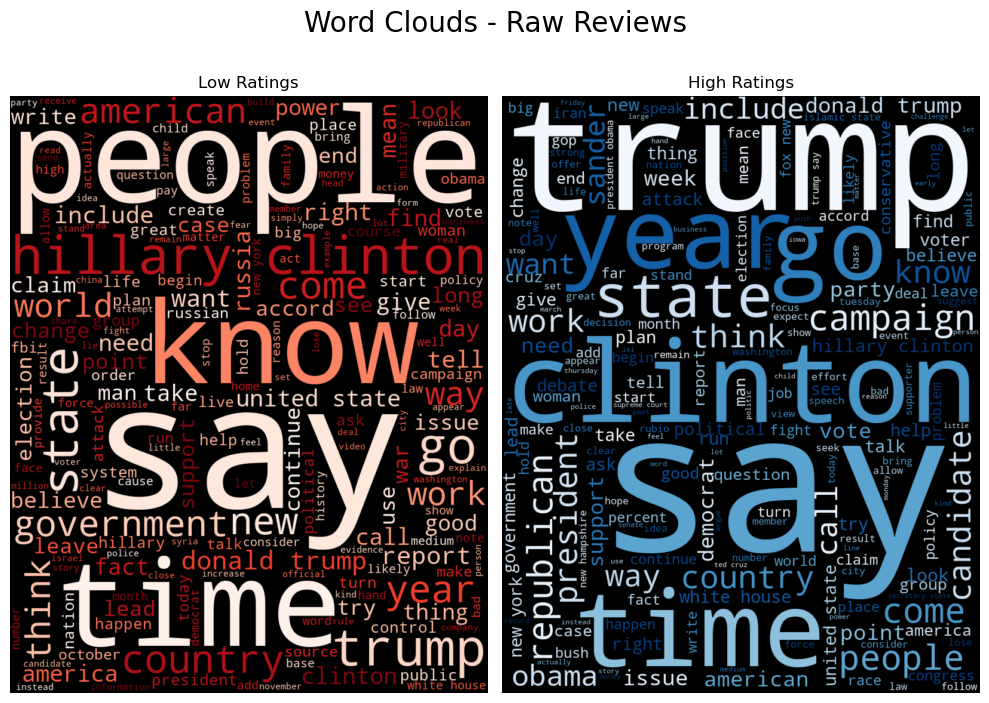

In [62]:
fake_cloud = WordCloud(random_state = 42,
                      width = 800,
                      height = 1000,
                      min_word_length = 2, colormap="Reds",
                     ).generate(fake_article_lemmas)
real_cloud = WordCloud(random_state = 42,
                       width = 800,
                       height= 1000,
                       min_word_length = 2,
                       colormap="Blues",
                      ).generate(real_article_lemmas)
# Plot the wordclouds side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 7))
axes[0].imshow(fake_cloud, interpolation='bilinear')
axes[0].set_title("Low Ratings")
axes[1].imshow(real_cloud, interpolation='bilinear')
axes[1].set_title("High Ratings")
[ax.axis('off') for ax in axes]
fig.tight_layout();
fig.suptitle('Word Clouds - Raw Reviews', fontsize=20, y=1.05);



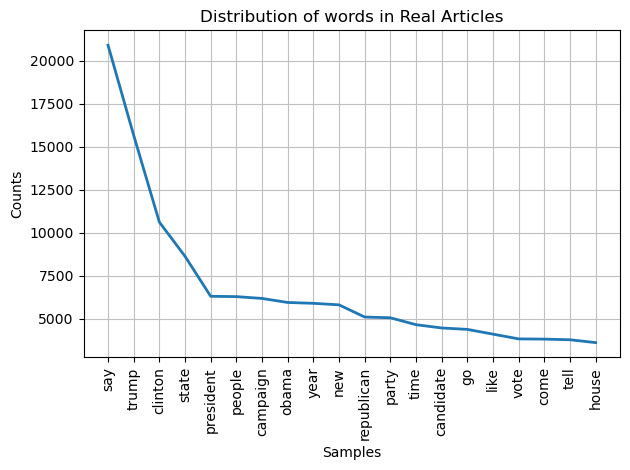

In [70]:
real_article_lemmas_split = real_article_lemmas.split()
real_dist = FreqDist(real_article_lemmas_split)
ax = real_dist.plot(20, show = False, title= 'Distribution of words in Real Articles')
plt.tight_layout()
plt.savefig('real_article_freq_dist.png')

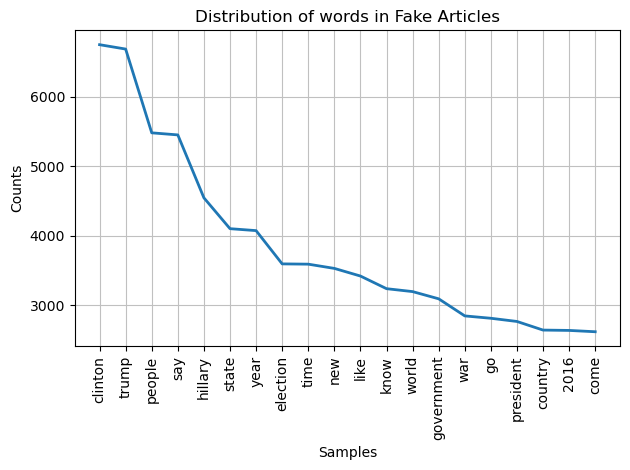

In [71]:
fake_article_lemmas_split = fake_article_lemmas.split()
fake_dist = FreqDist(fake_article_lemmas_split)
ax = fake_dist.plot(20, show = False, title = 'Distribution of words in Fake Articles')
plt.tight_layout()
plt.savefig('fake_articles_freq_dist.png')

# Another way

In [72]:
real_lemmas_list = df.loc[real_articles,'lemmas'].explode().to_list()
fake_lemmas_list = df.loc[fake_articles,'lemmas'].explode().to_list()

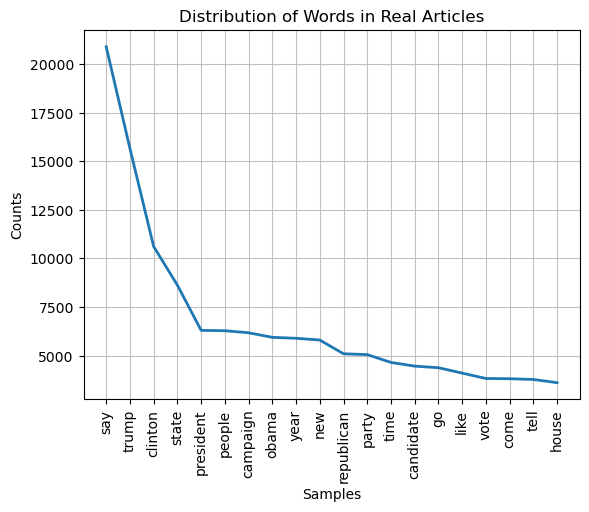

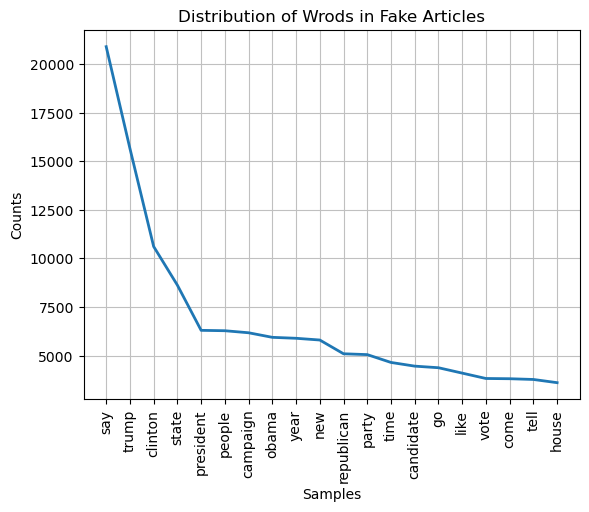

In [74]:
real_dist = FreqDist(real_lemmas_list)
real_dist.plot(20, title="Distribution of Words in Real Articles")

fake_dist = FreqDist(fake_lemmas_list)
real_dist.plot(20, title="Distribution of Wrods in Fake Articles");